In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('drug200.csv')

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## Explore the data

In [5]:
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [6]:
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [7]:
df.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

<AxesSubplot:>

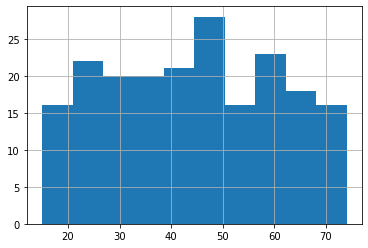

In [8]:
df.Age.hist()

<AxesSubplot:>

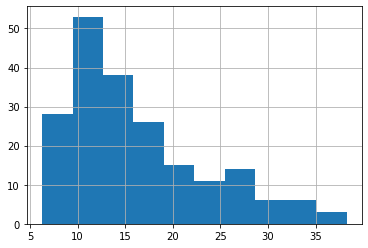

In [9]:
df.Na_to_K.hist()
# right skewed distribution

In [10]:
df.Drug.value_counts()
# five target ot classify

DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64

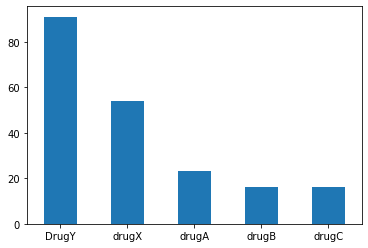

In [17]:
df.Drug.value_counts().plot(kind='bar')
plt.xticks(rotation=0);

In [11]:
df.duplicated().sum()

0

In [18]:
len(df)

200

In [25]:
mapper_Sex = {'M':1, 'F':0}
mapper_Chol = {'HIGH':1, 'NORMAL':0}
df['Sex'] = df['Sex'].map(mapper_Sex)
df['Cholesterol'] = df['Cholesterol'].map(mapper_Chol)

In [26]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,1,25.355,DrugY
1,47,1,LOW,1,13.093,drugC
2,47,1,LOW,1,10.114,drugC
3,28,0,NORMAL,1,7.798,drugX
4,61,0,LOW,1,18.043,DrugY


In [31]:
df[['BP_L', 'BP_H']] = pd.get_dummies(df['BP'], drop_first=True)

In [34]:
df.drop('BP', axis=1, inplace=True)

In [35]:
df.head()

,Age,Sex,Cholesterol,Na_to_K,Drug,BP_L,BP_H
0,23,0,1,25.355,DrugY,0,0
1,47,1,1,13.093,drugC,1,0
2,47,1,1,10.114,drugC,1,0
3,28,0,1,7.798,drugX,0,1
4,61,0,1,18.043,DrugY,1,0


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X=df.drop('Drug', axis=1)
y=df.Drug
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
y_pred = rfc.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

In [45]:
print(confusion_matrix(y_test, y_pred))

[[23  0  0  0  0]
 [ 0  2  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  8]]


In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        23
       drugA       1.00      1.00      1.00         2
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         2
       drugX       1.00      1.00      1.00         8

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [47]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)

In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        23
       drugA       1.00      1.00      1.00         2
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         2
       drugX       1.00      1.00      1.00         8

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [53]:
print(confusion_matrix(y_test, predictions))

[[23  0  0  0  0]
 [ 0  2  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  8]]


In [24]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'drug classification'])

0